# Exercise 4 - Image Analysis 

In [16]:
from scipy.ndimage import correlate
from skimage import io, color
from skimage.filters import median, gaussian, prewitt_h, prewitt_v, prewitt
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_ubyte


In [17]:
# now create a small and simple image:
input_img = np.arange(25).reshape(5, 5)
print(input_img)
# and a simple filter_
weights = [[0, 1, 0],
           [1, 2, 1],
           [0, 1, 0]]
# Now wecan correlate the image with the weights:
res_img = correlate(input_img, weights)
print(res_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


### Exercise 1 
Print the value in position (3,3) in res_img. Explain the value. 
The correlation function is the process of moving a filter mask over the image and computing the sum of products at each location. The calculation below shows what exactly is happening at position 3,3

In [18]:
print(res_img[3,3])
print(0*12+1*13+0*14+1*17+2*18+1*19+0*22+1*23+0*24)

108
108


#### Boarder Handling 
When the value of an output pixel at the boundary of the image is computed, a portion of the filter is usually outside the edge of the input image. One way to handle this, is to assume that the value of the off-the-edge pixels of the image are 0. This is called zero padding. Since 0 is the value of a black pixel, the output image will have a dark edge. Another approach is to reflect the actual pixel values of the image to the off-the-edge-pixel. This is the default behaviour of correlate. We can also set the off-the-edge-pixel to have a constant value (for example 10) by:

In [19]:
res_img_constant = correlate(input_img, weights, mode="constant", cval=10)


### Exercise 2
Compare the output images when using reflection and constant for the border. Where and why do you see the differences. The Mode parameter determines how the input array is extended beyond its boundaries. Reflect is extended by reflecting about the edge of the last pixel. Constant is extended by filling all the values beyond the edge with the same constant value, defined by the cval parameter.

In [20]:
res_img_reflection = correlate(input_img, weights, mode="reflect", cval=10)
print("Constant Mode \n", res_img_constant)
print("Reflection Mode \n", res_img_reflection)
print("Constant Pixel 0,0:",res_img_constant[0,0])
print("Mathematically calculated:",0*10+1*10+0*10+1*10+2*0+1*1+0*10+1*5+0*6)
print("Reflection Pixel 0,0:",res_img_reflection[0,0])
print("Mathematically calculated:",2*0+1*1+1*5+0*6)


Constant Mode 
 [[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]
Reflection Mode 
 [[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]
Constant Pixel 0,0: 26
Mathematically calculated: 26
Reflection Pixel 0,0: 6
Mathematically calculated: 6


#### Mean Filtering 
Now we will try some filters on an artificial imgae with the differnt types of noise starting with the mean filter. 
### Exercise 3 
Read and show the image $\textbf{Gaussian.png}$ from the exercise material. 

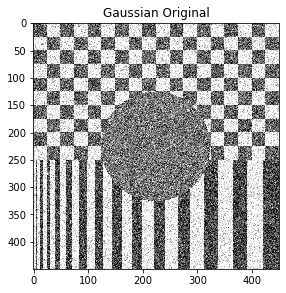

In [21]:
Gaussian_org = io.imread("data/Gaussian.png")
io.imshow(Gaussian_org)
plt.title("Gaussian Original")
io.show()

Create a mena filter with normalized weights: 

In [22]:
size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)
print(weights)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Use correlate with the Gaussian.png image and the mean filter. Show the resulting image together with the input image. What do you observe?

Try to change the size of the filter to 10, 20, 40 etc.. What do you see?

What happens to the noise and what happens to the places in image where there are transitions from light to dark areas?

#### Answer,    
applying the filter the image becomes blury. As we increate the filter the image becomes more blury. 

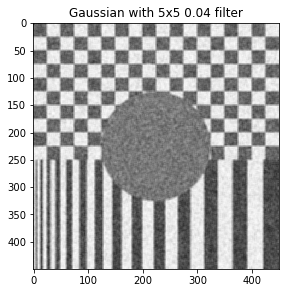

In [23]:
res_img_size5 = correlate(Gaussian_org.copy(), weights)
io.imshow(res_img_size5)
plt.title("Gaussian with 5x5 0.04 filter")
io.show()

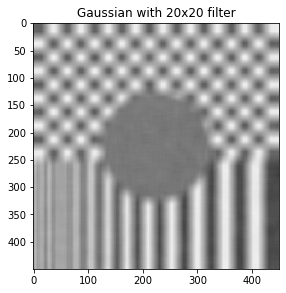

In [24]:
size = 20
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)
#print(weights)
res_img_size20 = correlate(Gaussian_org.copy(), weights)
io.imshow(res_img_size20)
plt.title("Gaussian with 20x20 filter")
io.show()

#### Median filtering 
The median filter belongs to the group of *rank filters* where the pixel values in a given area are sorted by value and then one of the values are picked. Here the median value of the sorted values. 

We can create a *footprint* which markes the size of the median filter and do the filtering like this: 
### Exercise 4  
Filter the Gaussian.png image with the median filter with differnt size (5, 10, 20, ...). What do you observe? What happens with the noise and with light-dark transitions?

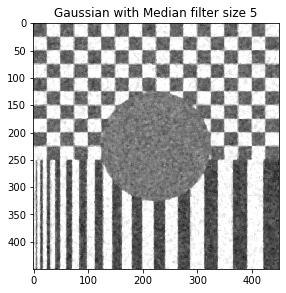

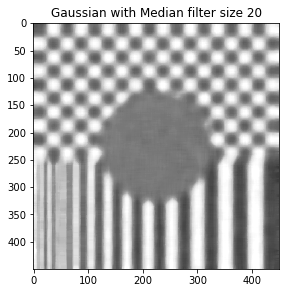

In [25]:
size = 5
footprint = np.ones([size, size])
med_img_5 = median(Gaussian_org.copy(), footprint)
med_img_20 = median(Gaussian_org.copy(), np.ones([20, 20]))
io.imshow(med_img_5)
plt.title("Gaussian with Median filter size 5")
io.show()
io.imshow(med_img_20)
plt.title("Gaussian with Median filter size 20")
io.show()

#### Comparing mean and median filtering 
Try to load and show the $\textbf{SaltPepper.png}$ image. This image has noise consist of very dark or very light pixels. 

### Exercise 5 
Try to use your mean and median filter with different filter sizes on the $\textbf{SaltPepper.png}$. What do you observe? Can they remove the noise and what happens to the image?

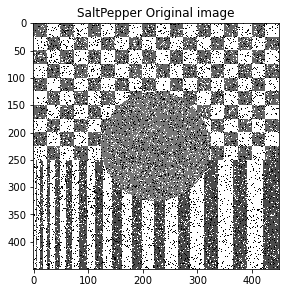

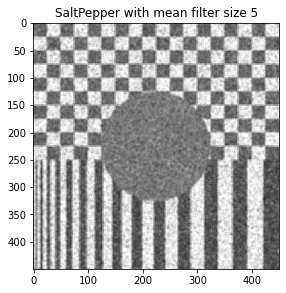

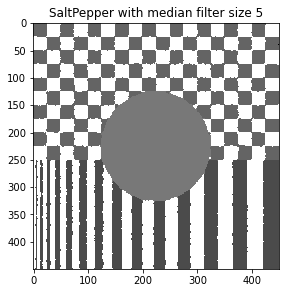

In [26]:
def mean_filter(input_img, size):
    # Two dimensional filter filled with 1
    weights = np.ones([size, size])
    # Normalize weights
    weights = weights / np.sum(weights)
    return correlate(input_img, weights)
    
def median_filter(input_img, size):
    footprint = np.ones([size, size])
    return median(input_img, footprint)

SaltPepper_org = io.imread("data/SaltPepper.png")
io.imshow(SaltPepper_org)
plt.title('SaltPepper Original image')
io.show()

io.imshow(mean_filter(SaltPepper_org.copy(),5))
plt.title('SaltPepper with mean filter size 5')
io.show()

io.imshow(median_filter(SaltPepper_org.copy(),5))
plt.title('SaltPepper with median filter size 5')
io.show()


#### Gaussian filter
Scikit-image contains many different filters.

The Gaussian filter is widely used in image processing. It is a smoothing filter that removes high frequencies from the image.

### Exercise  6
Let us try the Gaussian filter on the Gaussian.png image. 

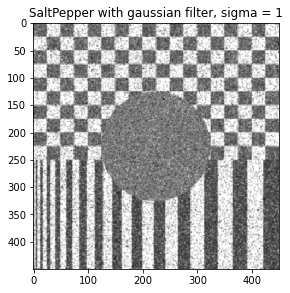

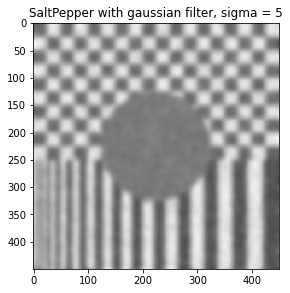

In [27]:
def gaussian_filtering(input_img, sigma):
    return gaussian(input_img, sigma)

io.imshow(gaussian_filtering(SaltPepper_org.copy(),1))
plt.title('SaltPepper with gaussian filter, sigma = 1')
io.show()

io.imshow(gaussian_filtering(SaltPepper_org.copy(),5))
plt.title('SaltPepper with gaussian filter, sigma = 5')
io.show()

### Exercise 7 
Use one of your images (or use the car.png image) to try the above filters. Especially, try with large filter kernels (larger than 10) with the median and the Gaussian filter. Remember to transform your image into gray-scale before filtering.

What is the visual difference between in the output? Try to observe places where there is clear light-dark transition.

#### Edge filters 
In image analysis, an edge is where there is a large transition from light pixels to dark pixels. It means that there is a high pixel value gradient at an edge. Since objects in an image are often of a different color than the background, the outline of the object can sometimes be found where there are edges in the image. It is therefore interesting to apply filters that can estimate the gradients in the image and using them to detect edges.

The Prewitt filter is a simple gradient estimation filter. The Python version of the Prewitt filter can estimate the horizontal gradient using the prewitt_h filter, the vertical gradient with the prewitt_v filter and the magnitude of the edges using the prewitt filter. The magnitude is computed as

$$V(x,y)=\sqrt(P_v^2+p_h^2) $$


where $\textbf{P}_v$ and $\textbf{P}_h$ are the outputs of the vertical and horizontal Prewitt filters.
### Exercise 8 
Try to filter the donald_1.png photo with the prewitt_h and prewitt_v filters and show the output without converting the output to unsigned byte. Notice that the output range is [0, 1]. Try to explain what features of the image that gets high and low values when using the two filters?

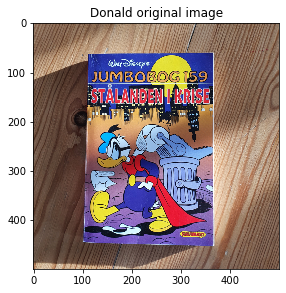

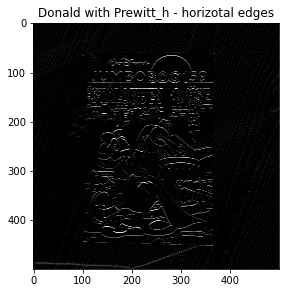

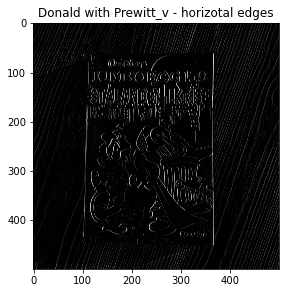

In [28]:
donald_org = io.imread("data/donald_1.png")
io.imshow(donald_org)
plt.title('Donald original image')
io.show()
#Convert ot gray scale
donald_gray = color.rgb2gray(donald_org.copy())
donald_prewitt_h = prewitt_h(donald_gray .copy())
donald_prewitt_v = prewitt_v(donald_gray .copy())
io.imshow(img_as_ubyte(donald_prewitt_h))
plt.title('Donald with Prewitt_h - horizotal edges')
io.show()

io.imshow(img_as_ubyte(donald_prewitt_v))
plt.title('Donald with Prewitt_v - horizotal edges')
io.show()



### Exercise 9
Use the prewitt filter on donald_1.png. What do you see?

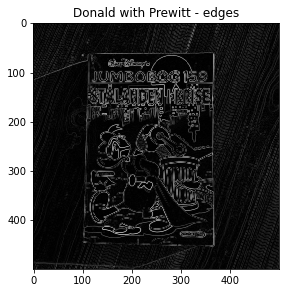

In [29]:
donald_prewitt = prewitt(donald_gray .copy())
io.imshow(img_as_ubyte(donald_prewitt))
plt.title('Donald with Prewitt - edges')
io.show()

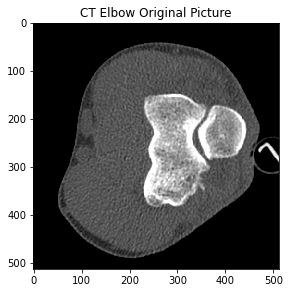

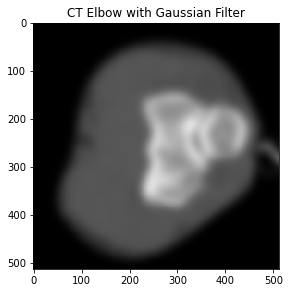

In [35]:
CT_org = io.imread("data/ElbowCTSlice.png")
io.imshow(CT_org)
plt.title("CT Elbow Original Picture")
io.show()
ct_gaussian = gaussian_filtering(CT_org.copy(),10)
io.imshow(ct_gaussian)
plt.title("CT Elbow with Gaussian Filter")
io.show()
